In [19]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import os
import numpy as np

In [20]:
with open("result.json", "r") as json_file:
    keypoints = json.load(json_file)

In [21]:
keypoints_list = []
for i in range(len(keypoints)):
    keypoints_list.append(keypoints[i]["keypoints"])
# value at index zero represent frame 0 
keypoints_list.reverse()

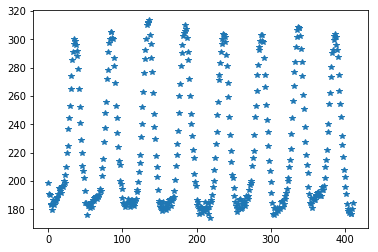

In [22]:
one_point = []
for i in range(len(keypoints_list)):
    one_point.append(keypoints_list[i][0:2])
x = []
y = []
for i in range(len(one_point)):
    x.append(one_point[i][0])
    y.append(one_point[i][1])
plt.plot(y, '*')
plt.show()

In [23]:
keypoint_names = ["nose", "left_eye", "right_eye", "left_ear","right_ear","left_shoulder","right_shoulder","left_elbow",
                  "right_elbow","left_wrist","right_wrist","left_hip","right_hip","left_knee","right_knee","left_ankle",
                  "right_ankle"]
points = {}
for i, j in zip(keypoint_names, range(0,51,3)):
    one_point = []
    for k in range(len(keypoints_list)):
        one_point.append(keypoints_list[k][j:j + 2])
    points[i] = one_point

In [24]:
np_keypoints = np.asarray(keypoints_list)
np_keypoints.shape

(412, 51)

In [25]:
pd_keypoints = pd.DataFrame(data=np_keypoints)
pd_keypoints.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,719.178,198.446,1.0,730.307,181.753,1.0,708.050,187.318,1.0,746.999,...,1.0,696.921,537.861,1.0,769.256,682.530,1.0,746.999,615.760,1.0
1,717.443,191.213,1.0,728.561,180.094,1.0,706.324,180.094,1.0,745.239,...,1.0,684.086,535.894,1.0,767.477,685.997,1.0,728.561,619.285,1.0
2,711.779,190.182,1.0,723.427,178.534,1.0,700.130,178.534,1.0,740.900,...,1.0,676.833,533.814,1.0,770.021,685.245,1.0,705.954,632.826,1.0
3,706.034,183.843,1.0,718.104,171.774,1.0,700.000,177.809,1.0,742.243,...,1.0,663.791,527.823,1.0,766.382,678.691,1.0,681.895,636.448,1.0
4,705.212,183.115,1.0,717.939,170.388,1.0,698.849,170.388,1.0,737.029,...,1.0,654.305,526.738,1.0,768.846,679.459,1.0,654.305,647.642,1.0


In [26]:
window_size = 10
pd_keypoints_mean = pd_keypoints.copy()
for i in range(51):
    pd_keypoints_mean[i] = pd.Series(pd_keypoints[i]).rolling(window_size).mean()

In [27]:
for i in range(len(keypoints)):
    if i >= 9:
        keypoints[len(keypoints) - 1 - i]["keypoints"] = pd_keypoints_mean.iloc[i].values.tolist()

In [28]:
with open("result_filter.json", "w") as json_file:
    json.dump(keypoints, fp=json_file)

In [ ]:
for i in keypoint_names:    
    one_point = points[i]
    x = []
    y = []
    for j in range(len(one_point)):
        x.append(one_point[j][0])
        y.append(one_point[j][1])
    y_mean = pd.Series(y).rolling(10).mean()
    x_mean = pd.Series(x).rolling(10).mean()
    plt.subplot(121)
    plt.plot(x, label="X")
    plt.plot(x_mean, label="X_mean")
    plt.title("X Component")
    plt.legend(loc='upper right', ncol=1)
    plt.subplot(122)
    plt.plot(y, label="Y")
    plt.plot(y_mean, label="Y_mean")
    plt.title("Y Component")
    plt.legend(loc='upper right', ncol=1)
#     plt.savefig(os.path.join("graphs", i + ".jpg"), quality=95, dpi=300)
    break

In [ ]:
print(y_mean)

In [ ]:
with open("filter_result.json", "r") as json_file:
    keypoints = json.load(json_file)
keypoints_list = []
for i in range(len(keypoints)):
    keypoints_list.append(keypoints[i]["keypoints"])
one_point = []
for i in range(len(keypoints_list)):
    one_point.append(keypoints_list[i][0:2])
x = []
y = []
for i in range(len(one_point)):
    x.append(one_point[i][0])
    y.append(one_point[i][1])
plt.plot(y)
plt.show()

In [ ]:
import numpy as np
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)
y_mean = running_mean(np.asarray(y), 20)
plt.plot(y_mean, '*')
plt.show()

In [ ]:
print(len(y_mean))

In [ ]:
y_pd_mean = pd.Series(y).rolling(20).mean()
plt.plot(y_pd_mean, '*')
plt.show()
print(len(y_pd_mean))